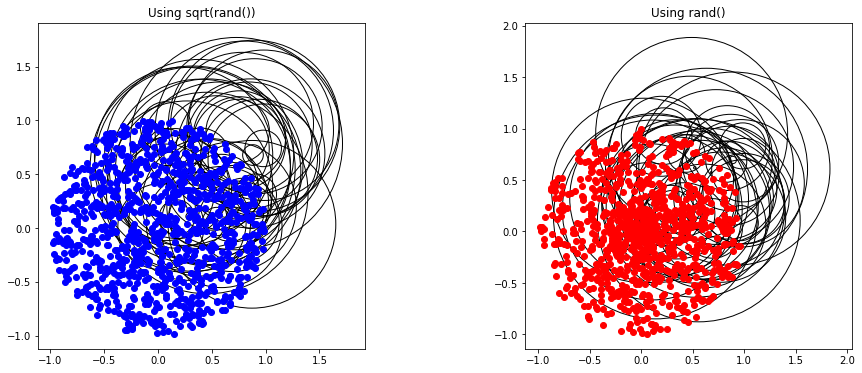

In [1]:
import math 
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

def NonUniformRandomPointInCircle(inputRadius = 1,xcenter=0,ycenter=0):
    r=inputRadius * random.random()
    theta = 2 * math.pi * random.random()
    return xcenter + r * math.cos(theta), ycenter + r * math.sin(theta)
    #return xcenter + r , ycenter + r + np.random.random()

def UniformRandomPointInCircle(inputRadius = 1, xcenter = 0, ycenter= 0):
    r= inputRadius * math.sqrt(random.random())
    theta = 2 * math.pi * random.random()
    return xcenter + r * math.cos(theta), ycenter + r * math.sin(theta)
    #return xcenter + r , ycenter + r + np.random.random()

def ReplicateNTimes(func, rad, xc,yc, Ntrials):
    xpoints, ypoints = [],[]
    for _ in range(Ntrials):
        xp,yp= func(rad,xc,yc)
        xpoints.append(xp)
        ypoints.append(yp)
    dist = (xpoints, ypoints, rad, xc, yc)
    return dist

def PlotDistribution(**kwargs):
    fig, ax = plt.subplots(1,2,figsize=(16,6))        
    colors = ['b', 'r']
    collects = dict()
    for i, key in enumerate(kwargs):
        (xpoints, ypoints, rad, xc, yc),subtitleinfo = kwargs[key]
        List = PlotDist(xpoints,ypoints,rad,xc,yc,subtitleinfo,i, colors[i])
        collects[colors[i]]=List
    plt.show()
    return collects


def PlotDist(xpoints, ypoints, rad, xc, yc, subtitleinfo, i, color ):
    plt.subplot(1,2,i+1)
    plt.plot(xpoints, ypoints, f'{color}o')
    
    List = calculating(xpoints, ypoints, rad, xc, yc )
    

    plt.title(subtitleinfo)
    plt.axis('square')
    return List
def calculating(xpoints, ypoints, rad, xc, yc):
    listing = []
    for i in range(50):
        x=np.random.random()
        y=np.random.random()
        radius = np.random.random()
        plt.gca().add_patch(Circle((x,y),radius= radius, color = 'black', fill = False))
        radius, area, perim, numberOfPoints, variance = pointsWithin(x,y,radius,xpoints, ypoints)
        listing.append((radius,area,perim,numberOfPoints, variance))
    return listing
def pointsWithin(x,y,radius,xpoints, ypoints):
    counter=0
    a=[]
    b=[]
    for i,j in zip(xpoints, ypoints):
        tracker = math.sqrt(((i-x)**2 )+((j-y)**2))
        if(tracker < (radius*radius)):
            counter+=1
            a.append(i)
            b.append(j)
    if counter==0:
        variance = 0
    else:
        arr = np.array([a,b])
        variance= np.var(arr)
    perim = 2*math.pi*radius
    area = math.pi*radius*radius
    return radius, area, perim, counter,variance
        
            
def main():
    Ntrials = 1000
    radius, xc, yc = 1,0,0
    
    dist1 = ReplicateNTimes(UniformRandomPointInCircle,radius, xc,yc, Ntrials=Ntrials)
    dist2 = ReplicateNTimes(NonUniformRandomPointInCircle,radius,xc,yc,Ntrials=Ntrials)
    #print(f"dist1: {dist1}")
    #print(f"dist2: {dist2}")
    collects  = PlotDistribution(Uniform=(dist1,"Using sqrt(rand())"),NonUniform =(dist2,"Using rand()") )
    return collects
    
#if __name__=='__main__':
#    main()

printer  = main()

#print(printer)

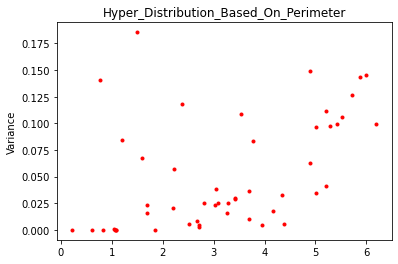

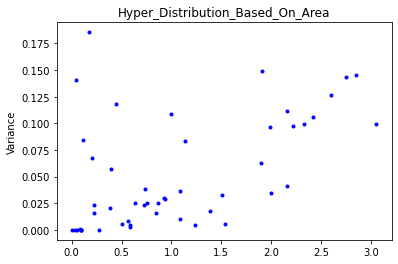

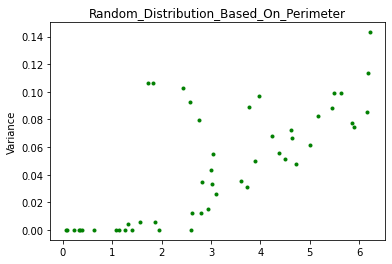

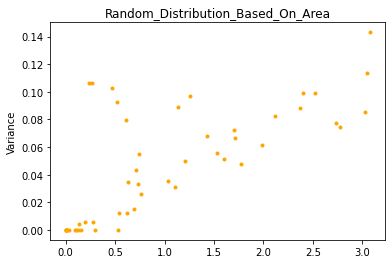

In [2]:
#radius, area, perim, numberOfPoints, variance
from matplotlib.ticker import FormatStrFormatter

hyperPerim = []
hyperArea = []
hyperRad = []
randomPerim = []
randomArea = []
randomRad = []
for i in printer:
    for j  in printer[i]:
        if(i=='b'):
            hyperPerim.append((j[2],j[4]))
            hyperArea.append((j[1],j[4]))
            hyperRad.append((j[0],j[4]))
        else:
            randomPerim.append((j[2],j[4]))
            randomArea.append((j[1],j[4]))
            randomRad.append((j[0],j[4]))

this = hyperPerim, hyperArea, hyperRad, randomPerim, randomArea, randomRad

def x_and_y(lister):
    x=[]
    y=[]
    for i,j in lister:
        x.append(i)
        y.append(j)
    return x,y

def plot(this,title,color):
    x,y=x_and_y(this)
    plt.plot(x,y,'.',color=color)
    plt.title(title)
    plt.ylabel('Variance')
    plt.show()
    
    
    
        

plot(hyperPerim, "Hyper_Distribution_Based_On_Perimeter",'r')
plot(hyperArea, "Hyper_Distribution_Based_On_Area",'b')
#plot(hyperRad, "Hyper_Distribution_Based_On_Radius",'y')
plot(randomPerim, "Random_Distribution_Based_On_Perimeter",'g')
plot(randomArea, "Random_Distribution_Based_On_Area",'orange')
#plot(randomRad, "Random_Distribution_Based_On_Radius",'pink')


   